In [1]:
%run ./data_processing.ipynb

**************************** Veri Seti Özeti *******************************
****************************Veri Seti Tipleri*******************************
***************************Veri Seti Sütunları******************************
**************************Veri Seti Boyutları*******************************
************************Veri Seti Bilgilendirme****************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 29 columns):
time                                           35064 non-null object
generation biomass                             35045 non-null float64
generation fossil brown coal/lignite           35046 non-null float64
generation fossil coal-derived gas             35046 non-null float64
generation fossil gas                          35046 non-null float64
generation fossil hard coal                    35046 non-null float64
generation fossil oil                          35045 non-null float64
generation fossil 

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression, PLSSVD
from sklearn.preprocessing import scale
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

In [4]:
df_num.head(4).style.background_gradient()

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation hydro run-of-river and poundage,generation hydro water reservoir,generation other renewable,generation solar,generation waste,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,447,329,4844,4821,1051,1899,73,49,196,6378,17,6436,26118,25385,50.1,65.41
1,449,328,5196,4755,1009,1658,71,50,195,5890,16,5856,24934,24382,48.1,64.92
2,448,323,4857,4581,973,1371,73,50,196,5461,8,5454,23515,22734,47.33,64.48
3,438,254,4314,4131,949,779,75,50,191,5238,2,5151,22642,21286,42.27,59.32


In [3]:
X = df_num.drop("price actual", axis = 1)
Y = df_num["price actual"]
x_train,x_val,y_train,y_val=train_test_split(X,Y,test_size=0.10,random_state=42)
x_train,x_test,y_train,y_test=train_test_split(x_train,y_train,test_size=0.20,random_state=42)
print("Train boyutu: x_train:{},y_train:{}".format(x_train.shape,y_train.shape))
print("Test boyutu: x_test:{},y_test:{}".format(x_test.shape,y_test.shape))
print("Eğitim öncesi veri seti : {}".format(df_num.shape))

Train boyutu: x_train:(25245, 15),y_train:(25245,)
Test boyutu: x_test:(6312, 15),y_test:(6312,)
Eğitim öncesi veri seti : (35064, 16)


# Doğrusal Modeller

## Model

In [59]:
type(LinearRegression())

sklearn.linear_model.base.LinearRegression

In [60]:
type(PLSRegression())

sklearn.cross_decomposition.pls_.PLSRegression

In [64]:
def features_coefficient(regression):
    print(regression)
    if type(regression) == "sklearn.cross_decomposition.pls_.PLSRegression":
        print("Bağımlı değişken katsayısı: {}".format(pls_model.y_mean_))
        print("Bağımsız değişkenlerin katsayıları: {}".format(pls_model.coef_))
    else:
        print("Bağımlı değişken katsayısı: {}".format(regression.y_mean_))
        print("Bağımsız değişkenlerin katsayıları: {}".format(regression.coef_))
    

In [53]:
features_coefficient(LinearRegression().fit(x_train,y_train))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Bağımlı değişken katsayısı: 14.48451782711561
Bağımsız değişkenlerin katsayıları: [ 1.11619551e-02 -1.43676847e-04  2.80878850e-04 -4.18212879e-04
  2.09705468e-03  8.12381734e-05 -3.43669563e-02  6.54213538e-04
 -1.48722518e-02 -7.81232666e-04 -9.14552609e-05  1.29275161e-03
 -3.05103575e-04  3.02569254e-04  8.13265886e-01]


In [55]:
x_reduced_train = PCA().fit_transform(scale(x_train))
features_coefficient(LinearRegression().fit(x_reduced_train,y_train))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Bağımlı değişken katsayısı: 57.88486710239652
Bağımsız değişkenlerin katsayıları: [ 3.83765907  0.65285519 -0.27237778  2.21111419  0.40317839 -2.54246229
 -6.00520265  3.95963385  4.47418571  0.9794275   6.75923512  0.67869219
  0.75838409  2.57628852 -4.48944083]


In [56]:
features_coefficient(Ridge(alpha = 0.1).fit(x_train, y_train))

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
Bağımlı değişken katsayısı: 14.484516354831193
Bağımsız değişkenlerin katsayıları: [ 1.11619563e-02 -1.43676899e-04  2.80878882e-04 -4.18212724e-04
  2.09705458e-03  8.12381716e-05 -3.43669325e-02  6.54213488e-04
 -1.48722519e-02 -7.81232650e-04 -9.14552542e-05  1.29275155e-03
 -3.05103502e-04  3.02569219e-04  8.13265834e-01]


In [57]:
features_coefficient(Lasso(alpha = 0.1).fit(x_train, y_train))

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
Bağımlı değişken katsayısı: 14.367985365229522
Bağımsız değişkenlerin katsayıları: [ 1.12608014e-02 -1.46061924e-04  2.81374011e-04 -4.09516242e-04
  2.08251152e-03  8.47527242e-05 -3.23219541e-02  6.46548175e-04
 -1.49480960e-02 -7.77719582e-04 -8.40382028e-05  1.28888757e-03
 -3.00408459e-04  2.98010681e-04  8.11028331e-01]


In [58]:
features_coefficient(ElasticNet().fit(x_train, y_train))

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
Bağımlı değişken katsayısı: 13.725119498064586
Bağımsız değişkenlerin katsayıları: [ 1.18043784e-02 -1.62054357e-04  2.87411089e-04 -3.55815159e-04
  2.01275714e-03  9.84038616e-05 -2.12952067e-02  6.09823045e-04
 -1.52549791e-02 -7.61797384e-04 -5.36837472e-05  1.26669606e-03
 -2.72640298e-04  2.75685420e-04  7.95713648e-01]


In [65]:
features_coefficient(PLSRegression().fit(x_train, y_train))

PLSRegression(copy=True, max_iter=500, n_components=2, scale=True, tol=1e-06)
Bağımlı değişken katsayısı: [57.8848671]
Bağımsız değişkenlerin katsayıları: [[ 1.15837156]
 [ 0.2161857 ]
 [ 1.2532778 ]
 [ 1.38126963]
 [ 0.46913363]
 [ 0.54588949]
 [ 1.42975701]
 [-0.60829237]
 [-0.23338568]
 [ 0.5516759 ]
 [-0.608032  ]
 [ 0.56979483]
 [ 1.70468858]
 [ 1.69268208]
 [ 5.51423951]]


## Tahmin

In [66]:
type(PCA())

sklearn.decomposition.pca.PCA

In [82]:
def model_predict(model):
    if type(PCA()) == "sklearn.decomposition.pca.PCA":
        x_reduced_train = pca.fit_transform(scale(x_train))
        model_reg = LinearRegression().fit(x_reduced_train, y_train)
        x_reduced_test = model.fit_transform(scale(x_test))
        pred_table = pd.DataFrame({"gercek_y": y_test[:],
                   "tahmin_y": model_reg.predict(x_reduced_test)[:]})
    else:
        model_predict = model.fit(x_train,y_train)
        pred_table = pd.DataFrame({"gercek_y": y_test[:],
                   "tahmin_y": model_predict.predict(x_test)[:]})
    return pred_table

In [77]:
model_predict(LinearRegression())

,gercek_y,tahmin_y
17121,78.72,72.804409
25913,78.95,74.681289
22059,45.90,48.184373
32836,68.94,64.757976
33961,59.80,59.612610
19550,48.48,51.236156
31591,70.68,66.552565
1739,50.71,57.948397
16821,78.91,70.825604
1170,80.41,67.791508


In [84]:
model_predict(Ridge(alpha = 0.1))

,gercek_y,tahmin_y
17121,78.72,72.804409
25913,78.95,74.681289
22059,45.90,48.184373
32836,68.94,64.757976
33961,59.80,59.612610
19550,48.48,51.236156
31591,70.68,66.552564
1739,50.71,57.948397
16821,78.91,70.825604
1170,80.41,67.791508


In [85]:
model_predict(Lasso(alpha = 0.1))

,gercek_y,tahmin_y
17121,78.72,72.810866
25913,78.95,74.695355
22059,45.90,48.188802
32836,68.94,64.737057
33961,59.80,59.636307
19550,48.48,51.233495
31591,70.68,66.533437
1739,50.71,57.937583
16821,78.91,70.807050
1170,80.41,67.780756


In [86]:
model_predict(ElasticNet())

,gercek_y,tahmin_y
17121,78.72,72.847279
25913,78.95,74.757738
22059,45.90,48.230102
32836,68.94,64.561809
33961,59.80,59.762133
19550,48.48,51.218174
31591,70.68,66.379211
1739,50.71,57.867836
16821,78.91,70.679977
1170,80.41,67.715464


## Model Tuning

In [111]:
print("***************** İlk Lineer Regresyon hali *************")
model = LinearRegression().fit(x_train,y_train)
reg_pred = model.predict(x_test)
print("MSE: {}".format(mean_squared_error(y_test,reg_pred)))
print("RMSE: {}".format(np.sqrt(mean_squared_error(y_test,reg_pred))))
print("R2 value: {}".format(r2_score(y_test, reg_pred)))

***************** İlk Lineer Regresyon hali *************
MSE: 86.9707310368521
RMSE: 9.32580993999192
R2 value: 0.570992175894057


In [110]:
print("***************** Lineer Regresyon düzenlenmiş hali *************")
model_tuned = LinearRegression(n_jobs=-1,normalize=True).fit(x_train,y_train)
reg_pred = model_tuned.predict(x_test)
print("MSE: {}".format(mean_squared_error(y_test,reg_pred)))
print("RMSE: {}".format(np.sqrt(mean_squared_error(y_test,reg_pred))))
print("R2 value: {}".format(r2_score(y_test, reg_pred)))

***************** Lineer Regresyon düzenlenmiş hali *************
MSE: 86.9707310368521
RMSE: 9.32580993999192
R2 value: 0.570992175894057


In [109]:
print("***************** PCA ilk model hali *********************")
x_reduced_train = PCA().fit_transform(scale(x_train))
pcr_model = LinearRegression().fit(x_reduced_train,y_train)
x_reduced_test = PCA().fit_transform(scale(x_test))
pcr_pred = pcr_model.predict(x_reduced_test)
print("MSE: {}".format(mean_squared_error(y_test,pcr_pred)))
print("RMSE: {}".format(np.sqrt(mean_squared_error(y_test,pcr_pred))))
print("R2 value: {}".format(r2_score(y_test, pcr_pred)))

***************** PCA ilk model hali *********************
MSE: 87.35177046329065
RMSE: 9.346216906497016
R2 value: 0.5691125907360834


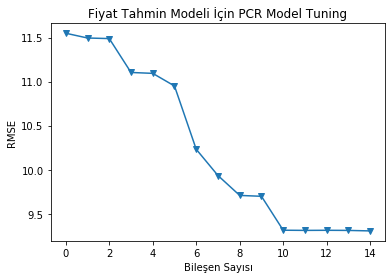

In [112]:
cv_10 = model_selection.KFold(n_splits = 10,
                             shuffle = True,
                             random_state = 1)
RMSE = []
for i in np.arange(1, x_reduced_train.shape[1] + 1):
    score = np.sqrt(-1*model_selection.cross_val_score(LinearRegression(), 
                                                       x_reduced_train[:,:i], 
                                                       y_train.ravel(), 
                                                       cv=cv_10, 
                                                       scoring='neg_mean_squared_error').mean())
    RMSE.append(score)
plt.plot(RMSE, '-v')
plt.xlabel('Bileşen Sayısı')
plt.ylabel('RMSE')
plt.title('Fiyat Tahmin Modeli İçin PCR Model Tuning');

In [114]:
print("***************** PCA model düzenlenmiş hali *********************")
x_reduced_train = PCA(n_components=13).fit_transform(scale(x_train))
pcr_model = LinearRegression().fit(x_reduced_train,y_train)
x_reduced_test = PCA(n_components=13).fit_transform(scale(x_test))
pcr_pred = pcr_model.predict(x_reduced_test)
print("MSE: {}".format(mean_squared_error(y_test,pcr_pred)))
print("RMSE: {}".format(np.sqrt(mean_squared_error(y_test,pcr_pred))))
print("R2 value: {}".format(r2_score(y_test, pcr_pred)))

***************** PCA model düzenlenmiş hali *********************
MSE: 87.3257080610119
RMSE: 9.344822526993859
R2 value: 0.5692411509351214


In [115]:
pls_model = PLSRegression().fit(x_train, y_train)
pls_pred = pls_model.predict(x_test)
print("************** İlk PLS Regresyon Modeli ******************")
print("MSE: {}".format(mean_squared_error(y_test,pls_pred)))
print("RMSE: {}".format(np.sqrt(mean_squared_error(y_test,pls_pred))))
print("R2 value: {}".format(r2_score(y_test, pls_pred)))

************** İlk PLS Regresyon Modeli ******************
MSE: 103.89115681899227
RMSE: 10.19270115420796
R2 value: 0.48752737157194315


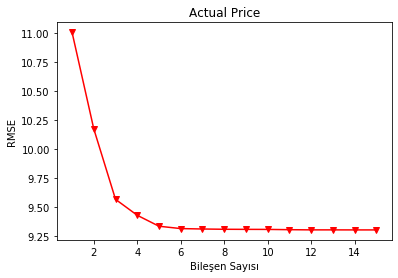

In [116]:
cv_10 = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)
RMSE = []
for i in np.arange(1, x_train.shape[1] + 1):
    pls = PLSRegression(n_components=i)
    score = np.sqrt(-1*cross_val_score(pls, x_train, y_train, cv=cv_10, scoring='neg_mean_squared_error').mean())
    RMSE.append(score)

#Sonuçların Görselleştirilmesi
plt.plot(np.arange(1, x_train.shape[1] + 1), np.array(RMSE), '-v', c = "r")
plt.xlabel('Bileşen Sayısı')
plt.ylabel('RMSE')
plt.title('Actual Price');

In [117]:
pls_model = PLSRegression(n_components=14).fit(x_train, y_train)
pls_pred = pls_model.predict(x_test)
print("************** Düzenlenmiş PLS Regresyon Modeli ******************")
print("MSE: {}".format(mean_squared_error(y_test,pls_pred)))
print("RMSE: {}".format(np.sqrt(mean_squared_error(y_test,pls_pred))))
print("R2 value: {}".format(r2_score(y_test, pls_pred)))

************** Düzenlenmiş PLS Regresyon Modeli ******************
MSE: 86.97067005761626
RMSE: 9.325806670611195
R2 value: 0.5709924766914514


In [5]:
ridge_model = Ridge(alpha = 0.1).fit(x_train, y_train)
ridge_pred = ridge_model.predict(x_test)
print("************** İlk Ridge Regresyon Modeli ******************")
print("MSE: {}".format(mean_squared_error(y_test,ridge_pred)))
print("RMSE: {}".format(np.sqrt(mean_squared_error(y_test,ridge_pred))))
print("R2 value: {}".format(r2_score(y_test, ridge_pred)))

************** İlk Ridge Regresyon Modeli ******************
MSE: 86.97073101193776
RMSE: 9.325809938656146
R2 value: 0.5709921760169541


In [4]:
interval = 10**np.linspace(10,-2,100)*0.5
ridge_cv = RidgeCV(alphas = interval, 
                   scoring = "neg_mean_squared_error",
                   normalize = True)
ridge_cv.fit(x_train, y_train)
ridge_cv.alpha_

0.005

In [6]:
ridge_tuned = Ridge(alpha = ridge_cv.alpha_, 
                   normalize = True).fit(x_train,y_train)
ridge_tuned_pred = ridge_tuned.predict(x_test)
print("************** Düzenlenmiş Ridge Regresyon Modeli ******************")
print("MSE: {}".format(mean_squared_error(y_test,ridge_tuned_pred)))
print("RMSE: {}".format(np.sqrt(mean_squared_error(y_test,ridge_tuned_pred))))
print("R2 value: {}".format(r2_score(y_test, ridge_tuned_pred)))

************** Düzenlenmiş Ridge Regresyon Modeli ******************
MSE: 86.9464567224116
RMSE: 9.324508390387752
R2 value: 0.5711119158421479


In [7]:
lasso_model = Lasso(alpha = 0.1).fit(x_train, y_train)
lasso_pred = lasso_model.predict(x_test)
print("************** Lasso Regresyon Modeli ******************")
print("MSE: {}".format(mean_squared_error(y_test,lasso_pred)))
print("RMSE: {}".format(np.sqrt(mean_squared_error(y_test,lasso_pred))))
print("R2 value: {}".format(r2_score(y_test, lasso_pred)))

************** Lasso Regresyon Modeli ******************
MSE: 86.97099746546509
RMSE: 9.32582422445679
R2 value: 0.5709908616592774


In [13]:
lasso_tuned = Lasso(alpha = lasso_cv_model.alpha_)
lasso_tuned.fit(x_train, y_train)
lasso_tuned_pred = lasso_tuned.predict(x_test)
print("************** Düzenlenmiş Lasso Regresyon Modeli ******************")
print("MSE: {}".format(mean_squared_error(y_test,lasso_tuned_pred)))
print("RMSE: {}".format(np.sqrt(mean_squared_error(y_test,lasso_tuned_pred))))
print("R2 value: {}".format(r2_score(y_test, lasso_tuned_pred)))

************** Düzenlenmiş Lasso Regresyon Modeli ******************
MSE: 86.9707294732807
RMSE: 9.325809856161593
R2 value: 0.5709921836068168


In [14]:
enet_model = ElasticNet().fit(x_train, y_train)
enet_pred = enet_model.predict(x_test)
print("************** ElasticNet Modeli ******************")
print("MSE: {}".format(mean_squared_error(y_test,enet_pred)))
print("RMSE: {}".format(np.sqrt(mean_squared_error(y_test,enet_pred))))
print("R2 value: {}".format(r2_score(y_test, enet_pred)))

************** ElasticNet Modeli ******************
MSE: 86.98909929752836
RMSE: 9.326794695795998
R2 value: 0.5709015692330414


In [15]:
enet_cv_model = ElasticNetCV(cv = 10, random_state = 5).fit(x_train, y_train)
enet_tuned = ElasticNet(alpha = enet_cv_model.alpha_).fit(x_train,y_train)
enet_tuned_pred = enet_tuned.predict(x_test)
print("************** Düzenlenmiş ElasticNet Modeli ******************")
print("MSE: {}".format(mean_squared_error(y_test,enet_tuned_pred)))
print("RMSE: {}".format(np.sqrt(mean_squared_error(y_test,enet_tuned_pred))))
print("R2 value: {}".format(r2_score(y_test, enet_tuned_pred)))

************** Düzenlenmiş ElasticNet Modeli ******************
MSE: 104.91958408403538
RMSE: 10.243026119464666
R2 value: 0.48245436208970216


# Lineer Olmayan Modeller

## KNN 

### Model

In [17]:
knn_model = KNeighborsRegressor().fit(x_train, y_train)
print("En yakın komşu sayısı: {}".format(knn_model.n_neighbors))
print("Etkili metrik : {}".format(knn_model.effective_metric_))

En yakın komşu sayısı: 5
Etkili metrik : euclidean


### Tahmin

In [19]:
y_pred = knn_model.predict(x_test)
RMSE = [] 
for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(x_train, y_train)
    y_pred = knn_model.predict(x_train) 
    rmse = np.sqrt(mean_squared_error(y_train,y_pred)) 
    RMSE.append(rmse) 
    print("k =" , k , "için RMSE değeri: ", rmse)

k = 1 için RMSE değeri:  0.0
k = 2 için RMSE değeri:  5.642292483310417
k = 3 için RMSE değeri:  6.845065793497076
k = 4 için RMSE değeri:  7.483650361502367
k = 5 için RMSE değeri:  7.95980822289186
k = 6 için RMSE değeri:  8.301745290351302
k = 7 için RMSE değeri:  8.565201008016516
k = 8 için RMSE değeri:  8.777601987474283
k = 9 için RMSE değeri:  8.954660087061132
k = 10 için RMSE değeri:  9.09664210002459


In [20]:
MSE = [] 
for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(x_train, y_train)
    y_pred = knn_model.predict(x_train) 
    mse = mean_squared_error(y_train,y_pred)
    MSE.append(rmse) 
    print("k =" , k , "için MSE değeri: ", mse)

k = 1 için MSE değeri:  0.0
k = 2 için MSE değeri:  31.835464467221232
k = 3 için MSE değeri:  46.85492571730376
k = 4 için MSE değeri:  56.0050227332145
k = 5 için MSE değeri:  63.35854694521688
k = 6 için MSE değeri:  68.91897486587003
k = 7 için MSE değeri:  73.36266830772713
k = 8 için MSE değeri:  77.04629665051247
k = 9 için MSE değeri:  80.18593727480567
k = 10 için MSE değeri:  82.74889749593979


### Model Tuning

In [22]:
knn_params = {'n_neighbors': np.arange(1,30,1)}
knn = KNeighborsRegressor()
knn_cv_model = GridSearchCV(knn, knn_params, cv = 10)
knn_cv_model.fit(x_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [26]:
RMSE = [] 
RMSE_CV = []
for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(x_train, y_train)
    y_pred = knn_model.predict(x_train) 
    rmse = np.sqrt(mean_squared_error(y_train,y_pred)) 
    rmse_cv = np.sqrt(-1*cross_val_score(knn_model, x_train, y_train, cv=10, 
                                         scoring = "neg_mean_squared_error").mean())
    RMSE.append(rmse) 
    RMSE_CV.append(rmse_cv)
    print("k =" , k , "için RMSE değeri: ", rmse, "RMSE_CV değeri: ", rmse_cv )

k = 1 için RMSE değeri:  0.0 RMSE_CV değeri:  11.428234284463937
k = 2 için RMSE değeri:  5.642292483310417 RMSE_CV değeri:  10.40013515083029
k = 3 için RMSE değeri:  6.845065793497076 RMSE_CV değeri:  10.146391543731493
k = 4 için RMSE değeri:  7.483650361502367 RMSE_CV değeri:  10.093626612472127
k = 5 için RMSE değeri:  7.95980822289186 RMSE_CV değeri:  10.108746731855474
k = 6 için RMSE değeri:  8.301745290351302 RMSE_CV değeri:  10.113358941541474
k = 7 için RMSE değeri:  8.565201008016516 RMSE_CV değeri:  10.143097026431342
k = 8 için RMSE değeri:  8.777601987474283 RMSE_CV değeri:  10.17938992106055
k = 9 için RMSE değeri:  8.954660087061132 RMSE_CV değeri:  10.201987808898899
k = 10 için RMSE değeri:  9.09664210002459 RMSE_CV değeri:  10.240691821546275


In [33]:
knn_tuned = KNeighborsRegressor(n_neighbors = knn_cv_model.best_params_["n_neighbors"])
knn_tuned.fit(x_train, y_train)
print("RMSE :",np.sqrt(mean_squared_error(y_test, knn_tuned.predict(x_test))))
print("MSE :",mean_squared_error(y_test, knn_tuned.predict(x_test)))

RMSE : 9.984075355674097
MSE : 99.68176070777884


## Random Forests

### Model

In [8]:
rf_model = RandomForestRegressor(random_state = 42)
rf_regression = rf_model.fit(x_train, y_train)

### Tahmin

In [10]:
rf_pred = rf_model.predict(x_test)
print("************** Random Forest Modeli ******************")
print("MSE: {}".format(mean_squared_error(y_test,rf_pred)))
print("RMSE: {}".format(np.sqrt(mean_squared_error(y_test,rf_pred))))
print("R2 value: {}".format(r2_score(y_test, rf_pred)))

************** Random Forest Modeli ******************
MSE: 44.765750006495566
RMSE: 6.6907211873231995
R2 value: 0.7791802279249602


## Gradient Boosting Machine

### Model

In [39]:
gbm_model = GradientBoostingRegressor()
gbm_model.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

### Tahmin

In [40]:
gbm_pred = gbm_model.predict(x_test)
print("************** GBM Modeli ******************")
print("MSE: {}".format(mean_squared_error(y_test,gbm_pred)))
print("RMSE: {}".format(np.sqrt(mean_squared_error(y_test,gbm_pred))))
print("R2 value: {}".format(r2_score(y_test, gbm_pred)))

************** GBM Modeli ******************
MSE: 73.4048253405281
RMSE: 8.567661602825366
R2 value: 0.6379098574568383


In [41]:
Importance = pd.DataFrame({"Importance": gbm_tuned.feature_importances_*100},
                         index = x_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

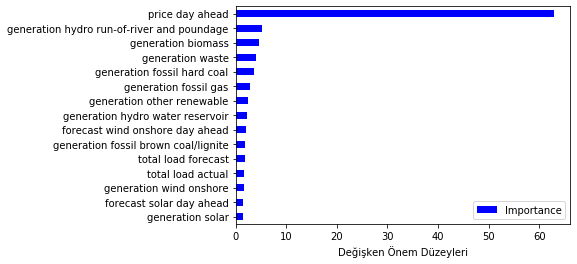

In [42]:
Importance.sort_values(by="Importance",axis = 0, 
                       ascending = True).plot(kind ="barh", color = "b")
plt.xlabel("Değişken Önem Düzeyleri")

## XGBoost

### Model 

In [17]:
xgb_model = XGBRegressor().fit(x_train, y_train)

### Tahmin

In [18]:
xgb_pred = xgb_model.predict(x_test)
print("************** XGBOOST GBM Modeli ******************")
print("MSE: {}".format(mean_squared_error(y_test,xgb_pred)))
print("RMSE: {}".format(np.sqrt(mean_squared_error(y_test,xgb_pred))))
print("R2 value: {}".format(r2_score(y_test, xgb_pred)))

************** XGBOOST GBM Modeli ******************
MSE: 44.93536467110353
RMSE: 6.703384568343333
R2 value: 0.7783435554337391


## Light GBM

### Model

In [27]:
lgbm = LGBMRegressor()
lgbm_model = lgbm.fit(x_train, y_train)

### Tahmin

In [29]:
lgbm_pred = lgbm_model.predict(x_test, 
                            num_iteration = lgbm_model.best_iteration_)
print("************** Light GBM Modeli ******************")
print("MSE: {}".format(mean_squared_error(y_test,lgbm_pred)))
print("RMSE: {}".format(np.sqrt(mean_squared_error(y_test,lgbm_pred))))
print("R2 value: {}".format(r2_score(y_test, lgbm_pred)))

************** Light GBM Modeli ******************
MSE: 52.70963390538209
RMSE: 7.260140074776938
R2 value: 0.7399947651171626


## CATBOOST

### Model

In [43]:
catb = CatBoostRegressor()
catb_model = catb.fit(x_train, y_train)

Learning rate set to 0.069341
0:	learn: 13.7272596	total: 167ms	remaining: 2m 47s
1:	learn: 13.2837305	total: 177ms	remaining: 1m 28s
2:	learn: 12.8768597	total: 186ms	remaining: 1m 1s
3:	learn: 12.5063869	total: 195ms	remaining: 48.6s
4:	learn: 12.1721612	total: 204ms	remaining: 40.6s
5:	learn: 11.8791823	total: 212ms	remaining: 35.2s
6:	learn: 11.6066229	total: 220ms	remaining: 31.2s
7:	learn: 11.3667774	total: 228ms	remaining: 28.3s
8:	learn: 11.1439880	total: 236ms	remaining: 26s
9:	learn: 10.9542518	total: 245ms	remaining: 24.3s
10:	learn: 10.7728666	total: 252ms	remaining: 22.7s
11:	learn: 10.6123331	total: 259ms	remaining: 21.4s
12:	learn: 10.4774017	total: 267ms	remaining: 20.2s
13:	learn: 10.3530619	total: 274ms	remaining: 19.3s
14:	learn: 10.2354423	total: 281ms	remaining: 18.5s
15:	learn: 10.1257594	total: 288ms	remaining: 17.7s
16:	learn: 10.0251085	total: 296ms	remaining: 17.1s
17:	learn: 9.9361908	total: 303ms	remaining: 16.5s
18:	learn: 9.8565832	total: 310ms	remaining: 

### Tahmin

In [45]:
catb_pred = catb_model.predict(x_test)
print("************** CATBOOST Modeli ******************")
print("MSE: {}".format(mean_squared_error(y_test,catb_pred)))
print("RMSE: {}".format(np.sqrt(mean_squared_error(y_test,catb_pred))))
print("R2 value: {}".format(r2_score(y_test, catb_pred)))

************** CATBOOST Modeli ******************
MSE: 42.15503314017032
RMSE: 6.492690747307338
R2 value: 0.7920583301189534


## En iyi Algoritmanın Tahimnleri

In [58]:
reg_pred_table = pd.DataFrame({"gercek_y": y_test[:],
                   "tahmin_y": catb_pred[:],"hata":abs(y_test[:]-catb_pred[:])         })
reg_pred_table

,gercek_y,tahmin_y,hata
17121,78.72,70.346224,8.373776
25913,78.95,78.712501,0.237499
22059,45.90,47.556645,1.656645
32836,68.94,68.465254,0.474746
33961,59.80,61.034208,1.234208
19550,48.48,52.257679,3.777679
31591,70.68,65.899021,4.780979
1739,50.71,54.827377,4.117377
16821,78.91,72.108999,6.801001
1170,80.41,68.631112,11.778888
